In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [3]:
data = np.load('data.npy')
target = np.load('target.npy')

In [4]:
data.shape

(8982, 100, 100, 1)

In [5]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#the first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#the second CNN layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons

model.add(Dense(3,activation="softmax"))
#The final layer with three outputs for three categories

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

 **ModelCheckpoint:** This Callback in Keras is used to save the model's weights at certain intervals(in this case,after each  epoch)during training.
* its configured to monitor the validation loss and save only the best model(one with the lowest validation loss).
* The filename for the saved models will be in the format 'model-{epoch:03d}.model'
* Where {epoch:03d} will be replaced by the epoch number

**verbose**: This parameter determines the verbosity mode.its an integer,either 0,1 or 2.the values represent different levels of verbosity during model training
* verbose =0: Silent mode. The training progress won't be displayed.
* verbose=1: Default mode. It displays a progress bar for each epoch during training. verbose=2: It shows one line per epoch during training, like Epoch 1/5 - loss: 0.35 - val_loss: 0.28.
* mode: This parameter defines the criteria to decide whether to save the model based on the monitored quantity (monitor).
* It accepts strings such as 'auto', 'min", 'max. This parameter works along with save_best_only.

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 55s 263ms/step - accuracy: 0.6019 - loss: 0.7943 - val_accuracy: 0.8738 - val_loss: 0.3412
Epoch 2/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 54s 266ms/step - accuracy: 0.8756 - loss: 0.3297 - val_accuracy: 0.8980 - val_loss: 0.2754
Epoch 3/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 53s 262ms/step - accuracy: 0.9105 - loss: 0.2535 - val_accuracy: 0.9072 - val_loss: 0.2524
Epoch 4/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 53s 262ms/step - accuracy: 0.9308 - loss: 0.2004 - val_accuracy: 0.9246 - val_loss: 0.2024
Epoch 5/5
203/203 ━━━━━━━━━━━━━━━━━━━━ 53s 262ms/step - accuracy: 0.9463 - loss: 0.1493 - val_accuracy: 0.9264 - val_loss: 0.2137


**mode='auto**: The mode is automatically inferred based on the monitored quantity.
* For instance, if monitor= 'val_loss', then mode='auto' will save the model with the lowest validation loss.
* mode='min: Save the model when the monitored quantity (e.g., validation loss) is minimized. mode='max: Save the model when the monitored quantity (e.g, validation accuracy) is maximized.

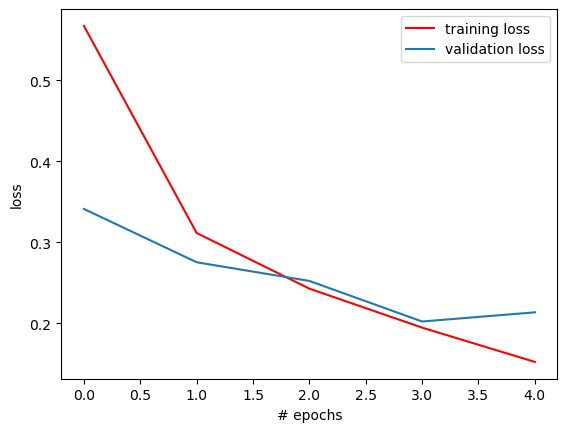

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

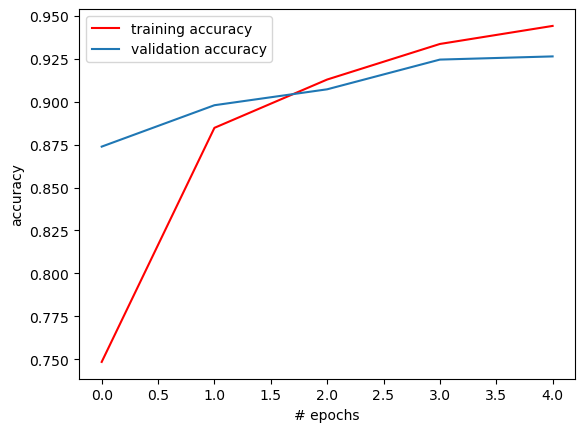

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
model.save('facedetector.h5')